In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")

In [103]:
# zdefiniujmy sobie kilka funkcji-helperów
def format_corr_value(val):
    if val == 1.0:
        return '1'
    v = int(val * 100)
    av = (abs(v) // 10) - 4
    if (av > 0):
        return '%s%s' % (v, '!' * av)
    return str(v)

def format_corr(dt):
    dt2 = dt.copy()
    for c in dt2.columns:
        dt2[c] = dt2[c].apply(format_corr_value)
    return dt2

Kolumny:

    pclass - Klasa biletu
    survived - Czy pasażer przeżył katastrofę
    name - Imię i nazwisko pasażera
    sex - Płeć pasażera
    age - Wiek pasażera
    sibsp - Liczba rodzeństwa/małżonków na pokładzie
    parch - Liczba rodziców/dzieci na pokładzie
    ticket - Numer biletu
    fare - Cena biletu
    cabin - Numer kabiny
    embarked - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
    boat - Numer łodzi ratunkowej
    body - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
    home.dest - Miejsce docelowe


In [3]:
# jak zwykle pierwszy rzut oka na dane
df.sample(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
135,1.0,0.0,"Goldschmidt, Mr. George B",male,71.0,0.0,0.0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
258,1.0,1.0,"Serepeca, Miss. Augusta",female,30.0,0.0,0.0,113798,31.0000,NaN,C,4,NaN,NaN
196,1.0,1.0,"Marechal, Mr. Pierre",male,NaN,0.0,0.0,11774,29.7000,C47,C,7,NaN,"Paris, France"
461,2.0,0.0,"Jarvis, Mr. John Denzil",male,47.0,0.0,0.0,237565,15.0000,NaN,S,NaN,NaN,"North Evington, England"
444,2.0,0.0,"Hickman, Mr. Stanley George",male,21.0,2.0,0.0,S.O.C. 14879,73.5000,NaN,S,NaN,NaN,"West Hampstead, London / Neepawa, MB"
1043,3.0,1.0,"Murphy, Miss. Margaret Jane",female,NaN,1.0,0.0,367230,15.5000,NaN,Q,16,NaN,NaN
976,3.0,0.0,"Lockyer, Mr. Edward",male,NaN,0.0,0.0,1222,7.8792,NaN,S,NaN,153.0,NaN
955,3.0,0.0,"Lefebre, Miss. Ida",female,NaN,3.0,1.0,4133,25.4667,NaN,S,NaN,NaN,NaN
1074,3.0,0.0,"O'Connor, Mr. Patrick",male,NaN,0.0,0.0,366713,7.7500,NaN,Q,NaN,NaN,NaN
1015,3.0,0.0,"Meo, Mr. Alfonzo",male,55.5,0.0,0.0,A.5. 11206,8.0500,NaN,S,NaN,201.0,NaN


In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [36]:
# sprawdzenie, czy nie ma duplikatów po name:
df[df.duplicated(subset=['name'])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
726,3.0,0.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN


In [37]:
# więc sprawdzmy te nazwiska
df[df['name'].isin(['Connolly, Miss. Kate', 'Kelly, Mr. James'])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3.0,1.0,"Connolly, Miss. Kate",female,22.0,0.0,0.0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3.0,0.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3.0,0.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN


In [74]:
# czyli widzimy, że to raczej zbieżność nazwisk

# Teraz tworzymy nową strukturę danych bardziej przejrzystą do obróbki. Nie mam ochoty analizować takich
# danych jak: home.dest, body, embarked, ticket, name - a w zasadzie to nawet boat i cabin zamienię na 
# wartość bool mial_lodke i mial_kabine. Łódką będę się zajmował później, bo jest coś ciekawego z łódką 'A'.
df2 = df.copy()
df2 = df2[[c for c in df.columns if c not in ['name', 'ticket', 'home.dest', 'body', 'embarked']]]
df2.columns = ['klasa_biletu', 'ocalal', 'plec', 'wiek', 'l_rdz_młż', 'l_dzieci_rodz', 'oplata', 'kabina', 'lodz']
df2['plec'] = df2['plec'].apply(lambda x: ({'female': 'K', 'male': 'M'}.get(x, x)))
df2['mial_lodke'] = df2['lodz'].notnull().astype(int)
df2['mial_kabine'] = df2['kabina'].notnull().astype(int)
df2.drop(
df2.sample(15)


,klasa_biletu,ocalal,plec,wiek,l_rdz_młż,l_dzieci_rodz,oplata,kabina,lodz,mial_lodke,mial_kabine
1252,3.0,0.0,M,44.0,0.0,0.0,8.0500,NaN,NaN,0,0
389,2.0,0.0,M,32.0,0.0,0.0,13.0000,NaN,NaN,0,0
638,3.0,0.0,M,35.0,0.0,0.0,7.0500,NaN,NaN,0,0
722,3.0,0.0,M,24.0,0.0,0.0,7.4958,NaN,NaN,0,0
649,3.0,0.0,M,23.0,0.0,0.0,7.0500,NaN,NaN,0,0
804,3.0,0.0,M,NaN,0.0,0.0,7.7500,NaN,NaN,0,0
301,1.0,0.0,M,47.0,0.0,0.0,34.0208,D46,NaN,0,1
95,1.0,1.0,K,54.0,1.0,1.0,81.8583,A34,5,1,1
206,1.0,0.0,M,44.0,2.0,0.0,90.0000,C78,NaN,0,1
433,2.0,0.0,M,30.0,0.0,0.0,10.5000,NaN,NaN,0,0


In [63]:
# analiza podejrzanych danych
# 1. Dlaczego mamy dane z zerową opłatą (fare[min] == 0)?
df2[df2['oplata'] == 0]

,klasa_biletu,ocalal,plec,wiek,l_rdz_młż,l_dzieci_rodz,oplata,kabina,port,lodz,cialo,dest,mial_lodke,mial_kabine
7,1.0,0.0,M,39.0,0.0,0.0,0.0,A36,S,NaN,NaN,"Belfast, NI",0,1
70,1.0,0.0,M,NaN,0.0,0.0,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast",0,0
125,1.0,0.0,M,NaN,0.0,0.0,0.0,B102,S,NaN,NaN,NaN,0,1
150,1.0,0.0,M,40.0,0.0,0.0,0.0,B94,S,NaN,110.0,NaN,0,1
170,1.0,1.0,M,49.0,0.0,0.0,0.0,B52 B54 B56,S,C,NaN,Liverpool,1,1
223,1.0,0.0,M,NaN,0.0,0.0,0.0,NaN,S,NaN,NaN,Belfast,0,0
234,1.0,0.0,M,38.0,0.0,0.0,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands",0,0
363,2.0,0.0,M,NaN,0.0,0.0,0.0,NaN,S,NaN,NaN,Belfast,0,0
384,2.0,0.0,M,NaN,0.0,0.0,0.0,NaN,S,NaN,NaN,Belfast,0,0
410,2.0,0.0,M,NaN,0.0,0.0,0.0,NaN,S,NaN,NaN,Belfast,0,0


In [75]:
# OK, widzimy, że to raczej wygląda na załogę, co jest dziwne - nie było tam kobiet[???] Żadne kelnerki,
# sprzątaczki, muzycy? 
# One płaciły za bilety, albo nie były uwzględnione tutaj? DZIWNE!!!!
# dalej - co z wiekiem - min jest ok. 0... Ale OK, mogą być przecież z rodzicami - więc sprawdźmy tych,
# co rodziców nie mieli...
df2[(df2['l_dzieci_rodz'] == 0) & (df2['wiek'] < 16)].sort_values(by="wiek", ascending=True).head(25)

,klasa_biletu,ocalal,plec,wiek,l_rdz_młż,l_dzieci_rodz,oplata,kabina,lodz,mial_lodke,mial_kabine
794,3.0,1.0,K,5.0,0.0,0.0,12.4750,NaN,13,1,0
855,3.0,0.0,M,11.0,0.0,0.0,18.7875,NaN,NaN,0,0
582,2.0,1.0,K,12.0,0.0,0.0,15.7500,NaN,9,1,0
1056,3.0,1.0,M,12.0,1.0,0.0,11.2417,NaN,C,1,0
653,3.0,1.0,K,13.0,0.0,0.0,7.2292,NaN,C,1,0
513,2.0,1.0,K,14.0,1.0,0.0,30.0708,NaN,NaN,0,0
569,2.0,0.0,M,14.0,0.0,0.0,65.0000,NaN,NaN,0,0
1057,3.0,1.0,K,14.0,1.0,0.0,11.2417,NaN,C,1,0
1236,3.0,1.0,M,14.0,0.0,0.0,9.2250,NaN,13,1,0
1279,3.0,0.0,K,14.0,0.0,0.0,7.8542,NaN,NaN,0,0


In [ ]:
# Skandal na pokładzie były dzieci bez rodziców - a nawet jedno miało 5 lat!

liczba wszystkich uczestników: 1309
W tym wyprawę przeżyło: 500


           liczba wszystkich  liczba ocalałych
plec                                          
Kobiety                  466             339.0
Mężczyźni                843             161.0


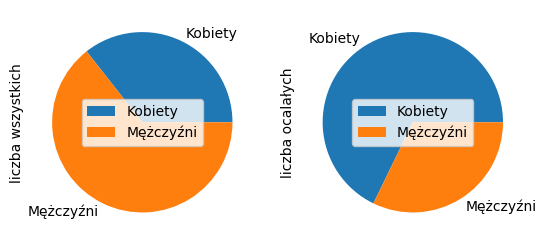

<Figure size 640x480 with 0 Axes>

In [100]:
# na początek kilka podstawowych danych szczególnie nas interesujących
print('liczba wszystkich uczestników: %s\nW tym wyprawę przeżyło: %s\n\n' % (
    df2.count()['plec'], df2[df2['ocalal'] == 1].count()['plec']))
by_sex = df2.groupby('plec').agg({'ocalal': ['count', 'sum']})
by_sex.rename(index={'M': 'Mężczyźni', 'K': 'Kobiety'}, inplace=True)
by_sex.columns = ['liczba wszystkich', 'liczba ocalałych']
print(by_sex)
by_sex.plot(kind='pie', subplots=True)
plt.show()
plt.clf()

In [125]:
# no wnioski tutaj się same nasuwają. Mężczyźni zachowali się bardzo dzielnie w większości! 
wmn = by_sex.loc['Kobiety']
mn = by_sex.loc['Mężczyźni']
print('Będąc kobietą miałeś %0.1f%% szans na przeżycie' % (100 * wmn['liczba ocalałych'] / wmn['liczba wszystkich']))
print('Będąc mężczyzną miałeś %0.1f%% szans na przeżycie' % (100 * mn['liczba ocalałych'] / mn['liczba wszystkich']))


Będąc kobietą miałeś 72.7% szans na przeżycie
Będąc mężczyzną miałeś 19.1% szans na przeżycie


In [109]:
# Dobra, rzut oka na korelację... Ale zanim, to dodajmy kolumnę z opłatą podzieloną przez 
# liczbę dzieci/braci/współmałżonków
df3 = df2.copy()
df3['cena_1os'] = df3['oplata'] / (df3['l_rdz_młż'] + df3['l_dzieci_rodz'] + 1)

format_corr(df3.corr(numeric_only=True))

,klasa_biletu,ocalal,wiek,l_rdz_młż,l_dzieci_rodz,oplata,mial_lodke,mial_kabine,cena_1os
klasa_biletu,1,-31,-40,6,1,-55!,-32,-71!!!,-50!
ocalal,-31,1,-5,-2,8,24,94!!!!!,30,21
wiek,-40,-5,1,-24,-15,17,-5,28,19
l_rdz_młż,6,-2,-24,1,37,16,-2,0,-8
l_dzieci_rodz,1,8,-15,37,1,22,8,3,-6
oplata,-55!,24,17,16,22,1,25,50!,83!!!!
mial_lodke,-32,94!!!!!,-5,-2,8,25,1,31,21
mial_kabine,-71!!!,30,28,0,3,50!,31,1,39
cena_1os,-50!,21,19,-8,-6,83!!!!,21,39,1


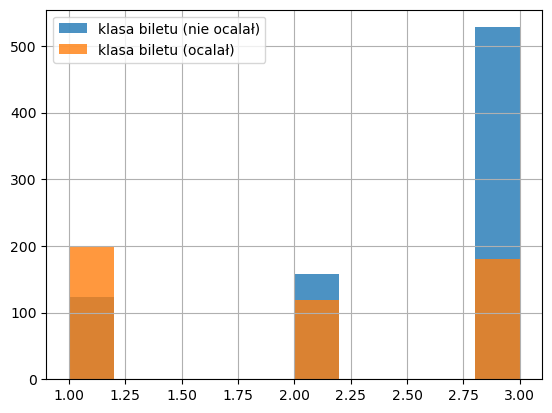

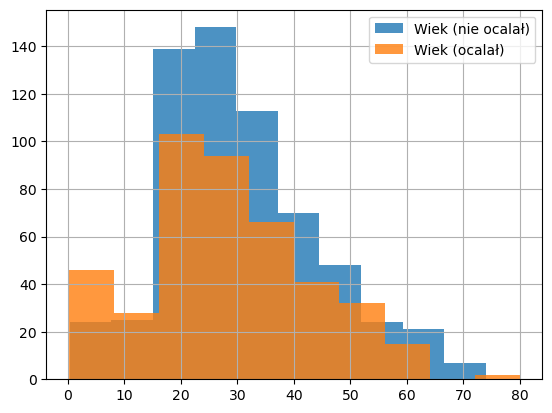

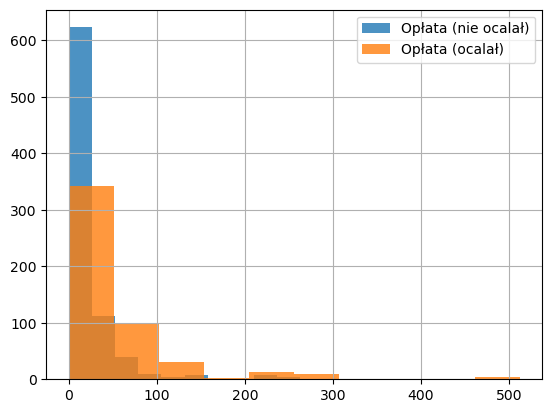

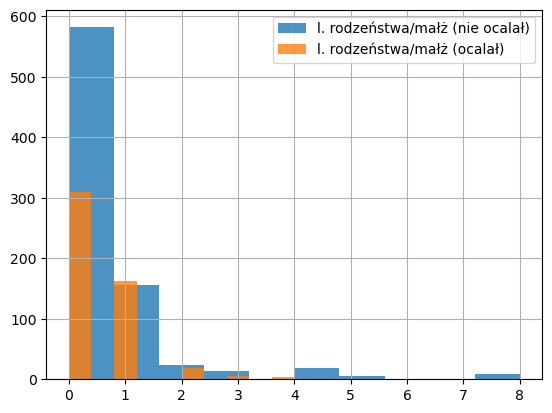

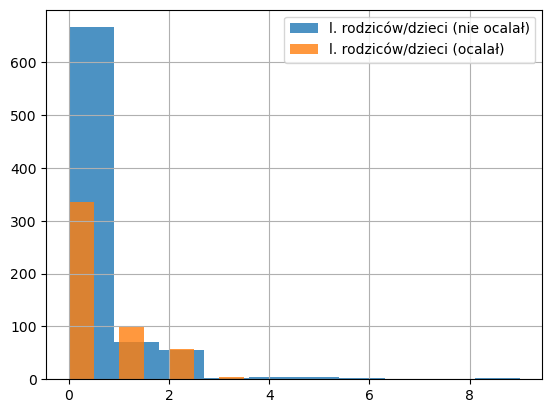

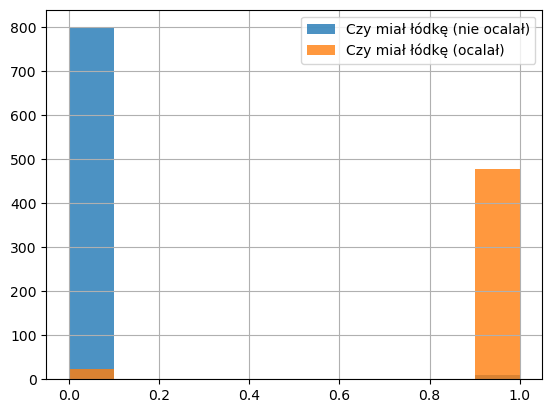

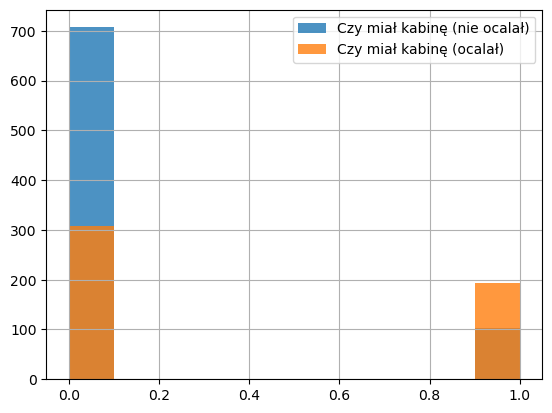

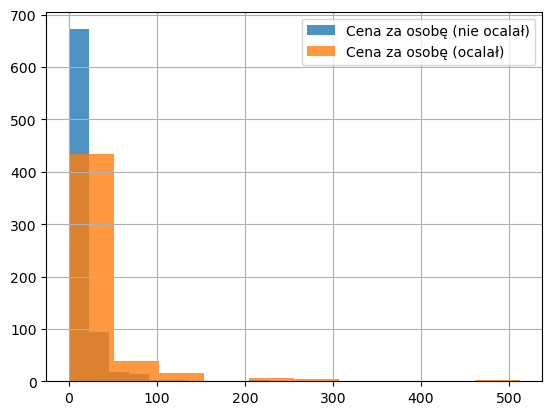

<Figure size 640x480 with 0 Axes>

In [121]:
# OK, widzimy już co nieco jak to trochę działało. Na uwagę przykuwa to, że to, czy ocalał, nie ma 
# 100% korelacji z tym, czy miał łódkę - przyjrzymy się temu bliżej. Widać, że fakt posiadania kabiny był 
# pewnym luksusem, który korelował z ceną, klasą biletu, a nawet miało jakieś znaczenie w tym, czy ten ktoś ocalał
# widać, że wiek koreluje z klasą biletu - wiadomo - statystycznie tych starszych bardziej może na to stać, jak
# i może się przekładać na rosnącą potrzebę komfortu wraz z wiekiem

# W każdym razie na wszelki wypadek narysujmy sobie jeszcze rozkłady w zależności "ocalał" od innych czynników
# aby zobaczyć, czy da się z tego coś wyciągnąć
plt.clf()

for k, desc in [
    ('klasa_biletu', 'klasa biletu'),
    ('wiek', 'Wiek'),
    ('oplata', 'Opłata'),
    ('l_rdz_młż', 'l. rodzeństwa/małż'),
    ('l_dzieci_rodz', 'l. rodziców/dzieci'),
    ('mial_lodke', 'Czy miał łódkę'),
    ('mial_kabine', 'Czy miał kabinę'),
    ('cena_1os', 'Cena za osobę'),
]:
    df4 = df3[df3[k].notnull()][['ocalal', k]]
    for survived in [0, 1]:
        add_to_title = ' (ocalał)' if survived else ' (nie ocalał)'
        df5 = df4[df4['ocalal'] == survived][k].copy()
        df5.name = desc + add_to_title
        # print(df5)
        # df4.plot(kind='hist', subplots=True, sharex=True, sharey=True, title=k + add_to_title)
        df5.hist(legend=True, alpha=0.8)
    plt.show()
    plt.clf()


## Wnioski z wykresów
- To co się rzuca w oczy, to klasa biletu zdawała się mieć kluczowe znaczenie na fakt przeżycia, albo nie Mniej więcej tyle samo osób ocalało z klasy 1 co i z klasy 3, ale za to zginęło prawie 5x więcej z klasy 3 co z klasy 1 A to jest bardzo duża dysproporcja.

- Co do kwestii wieku, to raczej nie odgrywa on zbyt wielkiej roli, ale dzięki rozkładowi można było zobaczyć jeden szczegół niewidoczny na tablicy korelacji - tzn. starano się jednak uratować przede wszystkim dzieci...

- Widać też dysproporcję pomiędzy tymi, co ocaleli i nie mieli kabiny od tych, co mieli kabinę wobec proporcji tych, co nie ocaleli i nie mieli kabiny od tych, co mieli kabinę. Tutaj ci co mieli kabinę - to właśnie byli VIP-ami i najwyraźniej mieli pierwszeństwo do łódek ratunkowych.

- Tak jak wcześniej zauważyłem - Będąc kobietą miałeś 72.7% szans na przeżycie, a będąc mężczyzną miałeś 19.1% szans na przeżycie.

In [65]:
# dziwne, że są tacy. co mieli łódkę, ale zginęli. Są też tacy, co łódki nie mieli, ale przeżyli... 
# Spójrzmy na nich
df2[((df2['ocalal'] == 1) ^ (df2['mial_lodke'] == 1))]

,klasa_biletu,ocalal,plec,wiek,l_rdz_młż,l_dzieci_rodz,oplata,kabina,port,lodz,cialo,dest,mial_lodke,mial_kabine
19,1.0,0.0,M,36.0,0.0,0.0,75.2417,C6,C,A,NaN,"Winnipeg, MN",1,1
166,1.0,0.0,M,NaN,0.0,0.0,30.6958,NaN,C,14,NaN,"New York, NY",1,0
192,1.0,1.0,K,58.0,0.0,0.0,146.5208,B80,C,NaN,NaN,NaN,0,1
358,2.0,1.0,K,42.0,0.0,0.0,13.0000,NaN,S,NaN,NaN,"New York, NY",0,0
395,2.0,1.0,K,18.0,0.0,1.0,23.0000,NaN,S,NaN,NaN,Southampton,0,0
396,2.0,1.0,K,34.0,0.0,1.0,23.0000,NaN,S,NaN,NaN,Southampton,0,0
458,2.0,1.0,K,17.0,0.0,0.0,10.5000,NaN,S,NaN,NaN,Guernsey,0,0
489,2.0,1.0,K,42.0,1.0,0.0,26.0000,NaN,S,NaN,NaN,"Weston-Super-Mare, Somerset",0,0
513,2.0,1.0,K,14.0,1.0,0.0,30.0708,NaN,C,NaN,NaN,"New York, NY",0,0
544,2.0,0.0,M,34.0,1.0,0.0,21.0000,NaN,S,12,NaN,"Elizabeth, NJ",1,0


In [67]:
# Niesamowita sprawa - najwięcej z tych, którzy ocaleli pomimo braku łódki - to były kobiety... 
# Jest to o tyle dziwne, że za burtą było znacznie więcej mężczyzn, niż kobiet.
# Czy to może spowodowane tym, że były na jakieś łodzi, ale tych danych brakuje? 
# Czy to może dlatego, że ci z łodzi ratowali kobiety i dobijali ponad miarową ilość?
# przyjrzyjmy się też łodzi A - coś się z nią stało? Czy zatonęła? Najwięcej tych, 
# którzy nie przeżyli pomimo posiadania łodzi, to było w łodzi A. Ile tam było osób?

df2[df2['lodz'] == 'A']

,klasa_biletu,ocalal,plec,wiek,l_rdz_młż,l_dzieci_rodz,oplata,kabina,port,lodz,cialo,dest,mial_lodke,mial_kabine
19,1.0,0.0,M,36.0,0.0,0.0,75.2417,C6,C,A,NaN,"Winnipeg, MN",1,1
235,1.0,1.0,M,NaN,0.0,0.0,39.6000,NaN,S,A,NaN,"Paris / New York, NY",1,0
317,1.0,1.0,M,21.0,0.0,1.0,61.3792,NaN,C,A,NaN,"Geneva, Switzerland / Radnor, PA",1,0
603,3.0,1.0,K,35.0,1.0,1.0,20.2500,NaN,S,A,NaN,"East Providence, RI",1,0
605,3.0,1.0,M,25.0,0.0,0.0,7.6500,F G63,S,A,NaN,"Perkins County, SD",1,1
630,3.0,1.0,M,27.0,0.0,0.0,7.7958,NaN,S,A,NaN,NaN,1,0
881,3.0,1.0,M,21.0,0.0,0.0,7.7958,NaN,S,A,NaN,NaN,1,0
921,3.0,0.0,M,NaN,0.0,0.0,7.2500,NaN,S,A,NaN,NaN,1,0
968,3.0,0.0,M,36.0,1.0,0.0,15.5500,NaN,S,A,NaN,NaN,1,0
969,3.0,0.0,K,30.0,1.0,0.0,15.5500,NaN,S,A,NaN,NaN,1,0


In [ ]:
# Jednak więcej z tej łodzi się uratowała. Może miała jakąś wywrotkę, zatonięcie,
# albo był tam jakiś inny incydent?

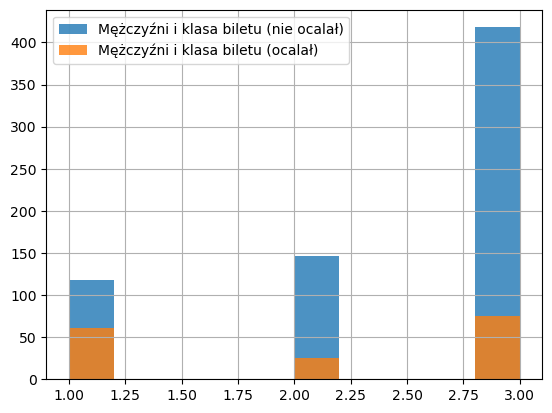

                 
       Liczebność
ocalal           
Nie           682
Tak           161
                                  
                        Liczebność
Czy ocalał Klasa biletu           
Nie        1.0                 118
           2.0                 146
           3.0                 418
Tak        1.0                  61
           2.0                  25
           3.0                  75


<Figure size 640x480 with 0 Axes>

In [174]:
# No i chciałbym przeprowadzić analizę samych mężczyzn (ich przeżycie, albo zatonięcie
# w zależności od posiadanej klasy biletu. Jak wiadomo - ich ocalało jedynie 161 osób, 
# a powyższy wykres histogramu przeżywalności w zależności od klasy biletu mógł nie 
# odzwierciedlać dobrze rzeczywistości, bo najwyraźniej za główny cel postawiono sobie
# ratowanie kobiet...

df4 = df3[df3['plec'] == 'M'][['ocalal', 'klasa_biletu', 'plec']]
for survived in [0, 1]:
    add_to_title = ' (ocalał)' if survived else ' (nie ocalał)'
    df5 = df4[df4['ocalal'] == survived]['klasa_biletu'].copy()
    df5.name = 'Mężczyźni i klasa biletu' + add_to_title
    df5.hist(legend=True, alpha=0.8)
plt.show()
plt.clf()

stat = df4.copy()
stat['ocalal'].replace({0: 'Nie', 1: 'Tak'}, inplace=True)

stat1 = stat.groupby(['ocalal']).agg({'plec': ['count']})
stat1 = stat1.rename(columns={'count': 'Liczebność'}, level=1)
stat1 = stat1.rename(columns={'plec': ''}, level=0)
print(stat1)

stat2 = stat.groupby(['ocalal', 'klasa_biletu']).agg({'plec': ['count']})
stat2.axes[0].names = ['Czy ocalał', 'Klasa biletu']
stat2 = stat2.rename(columns={'count': 'Liczebność'}, level=1)
stat2 = stat2.rename(columns={'plec': ''}, level=0)
print(stat2)


Z tych danych wynika ogromna dysproporcja pomiędzy uratowanymi z klasą 1 pomiędzy uratowanymi z klasą 3 w skali wszystkich mężczyzn.

           liczba ocalałych
plec                       
Kobiety                  21
Mężczyźni                 2


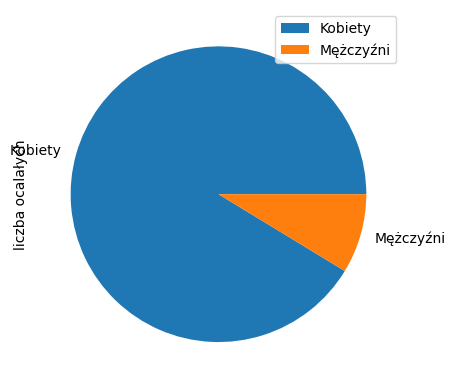

<Figure size 640x480 with 0 Axes>

In [179]:
# Teraz przeanalizujemy tych, którzy przeżyli pomimo braku łódki ratunkowej
df5 = df3[(df3['ocalal'] == 1) & (df3['mial_lodke'] == 0)]

by_sex = df5.groupby('plec').agg({'ocalal': ['count']})
by_sex.rename(index={'M': 'Mężczyźni', 'K': 'Kobiety'}, inplace=True)
by_sex.columns = ['liczba ocalałych pomimo braku łódki']
print(by_sex)
by_sex.plot(kind='pie', subplots=True)
plt.show()
plt.clf()

Widzimy tutaj zdumiewającą rzecz. Jaka miażdżąca statystyka na rzecz kobiet! Ciekawe z czego to wynika? 
Czy z tego, że kobietom bardziej pomagano przeżyć (np. użyczając im jakieś przedmioty, których mogły się złapać, 
a które wypłynęły na wierzch, czy może z tego, że co do natury mają większą wytrzymałość?

array([[<Axes: title={'center': 'wiek'}>]], dtype=object)

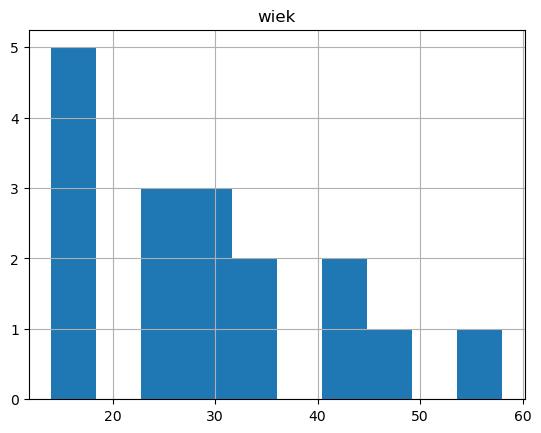

In [181]:
# a teraz sprawdzimy, czy wiek miał tutaj znaczenie w powyższym zjawisku

df5[['wiek']].hist()


Okazuje się, że to również może mieć znaczenie. Czyżby młodszy organizm to silniejszy i wytrzymalszy?
Ale liczna tych próbek jest jednak zbyt mała, aby wyciągać jakieś wnioski.